# L1b: Time Value of Money, Abstract Assets and the Net Present Value
Today, we will introduce the concepts of _Abstract Assets_ and the _Time Value of Money_. These concepts are foundational to understanding finance and investment, and we will see them over and over again throughout the course.

By the end of this lecture, students should be able to define and demonstrate the following concepts:
* __Time value of money__: The time value of money is the change in buying power over time. Money, and more specifically, its value or buying power, is not conserved like mass, momentum, or energy. The change (more often than not decrease) is called the Time Value of Money (TVM). How do we capture this change? We can use the concept of _discounting_ to capture the change in value over time.
* __Abstract Asset__: An abstract asset is a series of current and future cash flows. This framework can model the value of everything you consider an asset, such as cash, stocks, and bonds, or physical assets, such as a car or house.
* __Net Present Value (NPV)__: The net present value is the sum of all current and future cash flows, discounted to the present. NPV is a useful tool for evaluating investments and making financial decisions. A positive NPV indicates that the investment is expected to generate more cash flow than benchmark risk-free investments, while a negative NPV indicates the opposite.

Let's get started!

___

## Setup, Data, and Prerequisites
We set up the computational environment by including the `Include.jl` file, loading any needed resources, such as sample datasets, and setting up any required constants. 

> The `Include.jl` file also loads external packages, various functions that we will use in the exercise, and custom types to model the components of our problem. It checks for a `Manifest.toml` file. If it finds one, packages are loaded; otherwise, packages are downloaded and then loaded.

For clarity, `include(joinpath(@__DIR__, "Include.jl"))` loads the `Include.jl` file that lives next to this notebook. `@__DIR__` expands to the directory containing the notebook, so this call works even if you open the notebook from a different working directory in VSCode.

In [3]:
include(joinpath(@__DIR__, "Include.jl")); # this sets up the environment, we'll do this all the time, on everything we do

For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

___

## Time Value of Money
The time value of money is the principle that a dollar today has greater purchasing power than the same dollar received in the future. But _why_ does money lose value over time? 

> **Why Money Loses Value**: Inflation eats away purchasing power (3% inflation means 100 USD today = 97 USD buying power next year). Opportunity cost means money today can earn returns (miss out on 5% = lose 5 USD per 100 USD). Risk means future payments might not happen (bird in the hand vs. two in the bush). And impatience, people prefer money now due to a psychological preference for immediate gratification.

Bottom line: a dollar today is greater than a dollar tomorrow. Always. Let's look at how we can capture this mathematically.
Suppose we have $P$ USD today (units: current USD). Then, if we have a _discount rate_ of $\bar{r}$ (assumed constant), the future value $F$ of my money (units: future USD) is:
$$
\begin{align*}
F = \underbrace{\left(1+\bar{r}\right)}_{\mathcal{D}_{1,0}(\bar{r})>1}P
\end{align*}
$$
The conversion factor between current dollars and future dollars is the __discount factor__ $\mathcal{D}_{\star,0}(\bar{r})$. The __discount rate__ $\bar{r}$ has many names (depending upon context). For example, it could be an interest rate that we get from a savings account, or the weighted average cost of capital, i.e., the rate at which we can borrow. We'll just keep it general, and call it the discount rate.

## Multiple Period Discrete Discount Factor
When we have multiple investment periods with discrete compounding, e.g., an investment lasting many years, we can extend the present and future value relationship to multiple periods. At the end of each of these periods, we will have a compounding event:

> __Discrete compounding events__ are predetermined, periodic intervals (e.g., monthly, quarterly, annually) at which all accrued interest is fully reinvested, i.e., added to the principal, thereby increasing the base on which future interest is calculated. 

Assume discrete compounding and __one compounding event__ per period (typical unit of a period: years). Let $\dot{c}_{k}$ denote cash flow events in period(s) $k = 0,1,2,\dots$ and $r_{j+1,j}\geq{0}$ denote the discount rate between periods $j\rightarrow{(j+1)}$.
Then, by induction, cash flow events are related by the expression
$$
\begin{align*}
\dot{c}_{k} = \underbrace{\left[\prod_{j=0}^{k-1}\left(1+r_{j+1,j}\right)\right]}_{\mathcal{D}_{k,0}(r) \geq 1}\cdot\dot{c}_{0}\qquad{k=0,1,2,\dots}
\end{align*}
$$
where $\dot{c}_{0}$ is the cash flow event in period $k=0$ (now, the present value) and $\dot{c}_{k}$ is the cash flow event in period $k$ (the future value). The product term is the _multi-period discrete discount factor_ or $\mathcal{D}_{k,0}(r)\geq{1}$.
> __For $k=0$ (now):__ The present and future value are equal which means that $\mathcal{D}_{0,0}(r) = 1$. However, for $k>0$ (future), the discount factor $\mathcal{D}_{k,0}(r)>{1}$ for positive discount rates $r_{j+1,j}>0$.

Later, we will see there is information buried in the $r_{j+1,j}\geq{0}$ terms, i.e., the __short rates__ between periods, but often we assume the discount rate is constant in time.

> __Constant discount rate:__ Suppose we have a single compounding event per period. For the special case when the discount rate is constant $\bar{r}\equiv{r_{j+1,j}},\forall{j}$, the discrete multistep discount factor is given by $\mathcal{D}_{k,0}(\bar{r}) = \left(1+\bar{r}\right)^k$, where the period index $k$ is measured in years (typically).

However, what if we have multiple compounding events per year, e.g., instead of annual compounding we have semi-annual (two compounding events per year) or quarterly compounding (four compounding events per year)?

### Multiple compounding events per year
Suppose we have a __constant__ annualized discount rate $\bar{r}\geq{0}$ and $n$ compounding events yearly. 
Then, we can write the lifetime of the investment in terms of duration $T\geq{0}$ (units: years) instead of periods $k\geq{0}$, where $k = n\cdot{T}$.

> __Example:__ Suppose we have semi-annual compounding, i.e., two events per year so $n=2$. Then, for $k=1$, the investment lifetime is $T = k/n = 1/2 = 0.5$ years. Similarly, for $k=2$, the investment lifetime is $T = k/n = 2/2 = 1$ year, etc. 

Then, the discrete multistep discount factor for $T\geq{0}$ (units: years) for a constant annualized discount rate $\bar{r}\geq{0}$ is given by:
$$
\boxed{
\begin{align*}
\mathcal{D}_{T,0}(\bar{r}) = (1+\bar{r}/n)^{nT}
\end{align*}
}
$$

Let's consider a different case. Suppose we let $n\rightarrow\infty$, i.e., we move to continuous compounding (compounding events at every instant) for a fixed $T\geq{0}$. What happens to the discount factor $\mathcal{D}_{T,0}(\bar{r})$?

## Continuous Discounting
Continuous compounding assumes an infinite compounding events per period (compounding events at every instant). Thus, for a fixed $T\geq{0}$, and a time dependent discount rate $r(t)$, the discount factor becomes:
$$
\begin{align*}
 \mathcal{D}_{T,0}(\bar{r}) &= \exp\left(\int_{0}^{T}r(u)\,du\right)\quad\Longrightarrow\;\text{assume}\;r\;\text{constant}\\
&= \exp\left(\bar{r}\int_{0}^{T}1\,du\right)\\
&= \exp\left(\bar{r}\cdot{T}\right)\quad\blacksquare
\end{align*}
$$
where $\exp(\cdot)$ is the exponential function. Thus, the continuous discount factor is denoted as $\mathcal{D}_{T,0}(\bar{r}) = \exp\left(\bar{r}\cdot{T}\right)$.

> __For $T=0$ (now):__ The continuous discount factor, consistent with its discrete analog, is given by $\mathcal{D}_{0,0}(\bar{r}) = 1$. For $T>0$ (future) the continuous discount factor, consistent with its discrete analog, is given by $\mathcal{D}_{T,0}(\bar{r}) > 1$. 

Continuous discount factors are used for equity and derivatives, while discrete discounting is used for Treasury securities. Let's explore a quick example. 

> __Example:__ We invest 1 USD today. How much is that in $T$ years if we assume a constant annual discount (interest) rate of $\bar{r}$? Consider three cases: annual compounding, semi-annual compounding, and continuous compounding. Do we see any differences?

So what happens?

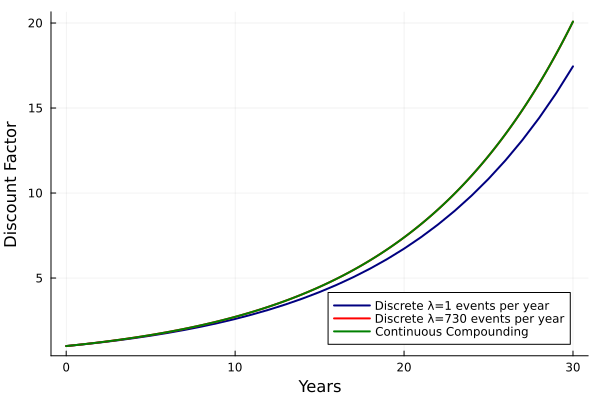

In [24]:
let

    # initialize -
    discrete_compounding_model = DiscreteCompoundingModel();
    T = 30.0;  # number of years; value ≥ 0
    r̄ = 0.10; # discount rate per year; value ≥ 0
    λ₁ = 1.0 |> Int;  # Annually (λ = 2.0 => every six months); value ≥ 1
    λ₂ = 365*2 |> Int;  # Let's pick a value value > 1
    N₁ = λ₁*T |> Int;  # total number of observations case 1
    N₂ = λ₂*T |> Int;  # total number of observations case 2
    𝒟(r,t) = exp(r*t); # continuous discount factor

    # let's compute the discount factors for discrete and continuous_compounding_model
    discount_dictionary_case_1 = discount(discrete_compounding_model, r̄, N₁, λ = λ₁);
    discount_dictionary_case_2 = discount(discrete_compounding_model, r̄, N₂, λ = λ₂);

    # convert discount data to array -
    # case 1
    k₁ = keys(discount_dictionary_case_1) |> collect |> sort;
    X₁ = Array{Float64,2}(undef, length(k₁),2);
    for i ∈ eachindex(k₁)
        k = k₁[i]
        X₁[i,1] = k/λ₁; # time -
        X₁[i,2] = discount_dictionary_case_1[k];
    end

    # case 2
    k₂ = keys(discount_dictionary_case_2) |> collect |> sort;
    X₂ = Array{Float64,2}(undef, length(k₂),2);
    for i ∈ eachindex(k₂)
        k = k₂[i]
        X₂[i,1] = k/λ₂; # time -
        X₂[i,2] = discount_dictionary_case_2[k];
    end

    # case 3: continuous -
    k₃ = 0:0.001:T |> collect;
    X₃ = Array{Float64,2}(undef, length(k₃),2);
    for i ∈ eachindex(k₃)
        k = k₃[i]
        X₃[i,1] = k; # time -
        X₃[i,2] = 𝒟(r̄,k);
    end

    # let's make some plots
    plot(X₁[:,1], X₁[:,2], label = "Discrete λ=$(λ₁) events per year", xlabel = "Years", ylabel = "Discount Factor", legend = :bottomright, c=:navy, lw=2)
    plot!(X₂[:,1], X₂[:,2], label = "Discrete λ=$(λ₂) events per year", c=:red, lw=2)
    plot!(X₃[:,1], X₃[:,2], label = "Continuous Compounding", c=:green, lw=2)
end

__Should we expect these values to be so close?__
With our discount factor $\mathcal D_{T,0}(\bar{r},n)=(1+ \bar{r}/n)^{nT}$, as $n$ grows you approach the continuous limit $e^{\bar{r}T}$ **very** fast. We can rewrite the discrete discount as:
$$
\begin{align*}
\mathcal{D}_{T,0}(\bar{r},n) & = e^{\bar{r} T}\,\exp\!\Big(-\frac{\bar r^{2}T}{2n}+\frac{\bar r^{3}T}{3n^{2}}-\cdots\Big).
\end{align*}
$$
So the relative gap between continuous compounding and discrete compounding is:
$$
\boxed{
\begin{align*}
1-\frac{\mathcal{D}_{T,0}(\bar{r},n)}{e^{\bar{r} T}}
\approx \frac{\bar{r}^{2}T}{2n}\quad\text{(for large $n$)}\quad\blacksquare
\end{align*}}
$$

Let's check this gap for different values of $n$ and $\bar{r}$:

In [28]:
let
    # initialize -
    T = 30.0;  # number of years; value ≥ 0
    r̄ = 0.15; # discount rate per year; value ≥ 0
    n = 1 |> Int;  # every hour

    gap = (r̄^2 * T) / (2 * n); # compute the gap

    # print -
    println("Gap with n = $(n) over T = $(T) years at an annual rate of r̄ = $(r̄) is ≈ $(gap).")
end

Gap with n = 1 over T = 30.0 years at an annual rate of r̄ = 0.15 is ≈ 0.33749999999999997.


## Who sets the Discount Rate?
The discount rate is not a fixed value; it is determined by the market, the industry, etc. Thus, an entirely unsatisfying answer to the question is "it depends." However, let's dig a little deeper.

### The Federal Reserve
The United States Federal Reserve, created by the [Federal Reserve Act of 1913](https://www.federalreserve.gov/aboutthefed/fract.htm), is the nation’s central banking system, comprising a Board of Governors in Washington, D.C., and twelve regional Federal Reserve Banks. 

> __The Federal Reserve__ conducts monetary policy, via tools such as open market operations, the discount rate, and reserve requirements, to promote maximum employment, stable prices, and moderate long-term interest rates, while also supervising banks and serving as the lender of last resort.
>
> __Federal Open Market Committee (FOMC)__ is the body responsible for setting the federal funds rate, the interest rate at which banks can borrow from the Federal Reserve. Many other rates are pegged to the fed funds rate. The FOMC meets regularly to assess economic conditions and adjust the federal funds rate as needed to achieve its monetary policy goals. 
>
> __Optional__: Meet Susan and Ronnie from the Federal Reserve — [watch here](https://youtu.be/xHQJBNO0yQc).

The FOMC's decisions on interest rates influence the discount rate used in financial models, affecting everything from mortgage rates to corporate borrowing costs. They also impact consumer and investor sentiment. Thus, the FOMC plays a crucial role in shaping the economic landscape.

What do the __prediction markets__, e.g., Kalshi, expect to happen at the [next FOMC meeting in September 2025?](https://kalshi.com/markets/kxfeddecision/fed-meeting)

### What discount rate should I use?
_It depends_ on risk. The higher the risk, the higher required return. Here are the rough ranges:

* **Safe stuff (2-5%)**: Treasury bills around 5%, AAA corporate bonds around 5%. Sleep well at night territory. Although these instruments also carry some unique risks.
* **Moderate risk (5-12%)**: Investment grade bonds 5-7%, large cap stocks 8-12%, real estate 7-10%. Still pretty safe.
* **Risky stuff (12%+)**: Small cap stocks 12-18%, private equity 15-25%, startups 25-50%, crypto 20-100%+ (good luck!). Hold onto your hat.

_The key principle_: investors want compensation for risk. There is no free lunch: If we accept more risk, we should expect higher returns.

<div>
    <center>
        <img src="figs/Fig-Bond-Asset-Timeline-Schematic.svg" width="580"/>
    </center>
</div>

## Abstract Assets and the Net Present Value (NPV)
An abstract asset is a sequence of current and future cash flows demarcated in a currency, for example, Euros, Dollars, Yuan, or cryptocurrencies such as Bitcoin.

> __Abstract assets__ are a useful __mental model__ for describing the financial value of a process, product, or investment over time. However, there is a catch: money today is not worth the same as money tomorrow (purchasing power is not conserved). Thus, we must account for the time value of money when evaluating abstract assets.

Suppose at each time period $t$, we have a cash flow vector $\dot{\mathbf{c}}_{t}\in\mathbb{R}_{\geq{0}}^{n}$, and a direction vector $\mathbf{\nu}_{t}\in\mathbb{Z}^{n}_{\pm{1}}$; if $\nu_{t,i}>0$, then cash flow event $\dot{c}_{t,i}$ is an inflow, while if $\nu_{t,i}<0$, then cash flow event $\dot{c}_{t,i}$ is an outflow. The __net cash flow__ during time period $t$ is given by the [scalar product](https://en.wikipedia.org/wiki/Dot_product): 
$$
\begin{align*}
\bar{c}_{t} = \left<\dot{\mathbf{c}}_{t}, \mathbf{\nu}_{t}\right> = \sum_{i=1}^{n} \dot{c}_{t,i} \nu_{t,i}
\end{align*}
$$
Suppose our abstract asset has a life of $t = 0,1,2,\ldots,T$ time periods. A naive (and incorrect) approach to calculating the value of the asset would be to simply sum the __net cash flows__:
$$
\begin{align*}
\texttt{value} = \sum_{t=0}^{T} \bar{c}_{t}
\end{align*}
$$
However, remember that $\bar{c}_{t}$ for $t>0$ has units of __future dollars__. Thus, $\bar{c}_{i}$ and $\bar{c}_{j}$ (where $i \neq j$) are not directly comparable (they have different units).

Discounting the sum of cash flows back to today is the key idea behind the net present value (NPV) calculation.

### Net Present Value (NPV)
The net present value (NPV) is the difference between the present value of cash inflows and the present value of cash outflows over a specific time period. NPV is used to evaluate the profitability of an investment or project by considering the time value of money.

Given the net cash flows $\bar{\mathbf{c}}=\left\{\bar{c}_{0},\bar{c}_{1},\dots,\bar{c}_{T}\right\}$ we can express it as the sum of discounted future cash flows:
$$
\begin{align*}
\texttt{NPV} & = \sum_{t=0}^{T} \bar{c}_{t}\quad\Longrightarrow\text{present value of $\bar{c}_{t}$ is $\mathcal{D}_{t,0}^{-1}(r)\;\bar{c}_{t}$}\\
& = \sum_{t=0}^{T} \mathcal{D}_{t,0}^{-1}(r)\;\bar{c}_{t}\quad\blacksquare
\end{align*}
$$
However, often, we'll make the assumption that the discount factor is constant over time, i.e., $\mathcal{D}_{t,0}(r) = \mathcal{D}_{t,0}(\bar{r})$ for all $t$. This simplifies the NPV calculation to:
$$
\boxed{
\begin{align*}
\texttt{NPV}_{T,0}(\bar{r}) = \underbrace{\sum_{t=0}^{T} \mathcal{D}_{t,0}^{-1}(\bar{r})\;\bar{c}_{t}}_{=\left<\mathcal{D}_{\star,0}^{-1}(\bar{r}),\;\mathbf{\bar{c}}\right>}
\end{align*}}
$$

The sign of the NPV indicates whether the investment is expected to generate a profit or a loss. 
* __Positive__: If NPV is positive, the projected earnings (in present dollars) exceed the anticipated costs (also in present dollars), making the investment potentially worthwhile. 
* __Negative__: Conversely, a negative NPV implies that the costs outweigh the benefits, signaling that the investment may not be a good idea.
* __Zero__: If NPV is zero, the investment is expected to break even, generating neither profit nor loss. Alternatively, we can think about the $\texttt{NPV} = 0$ case as the value returned by a __risk-free__ alternative investment. This will become clearer when we explore United States treasury securities (next time).

Let's do an NPV example calculation to illustrate these concepts.

> __Example__
>
> [▶ Is buying a Tesla worth it?](./CHEME-5660-L1b-NetPresentValue-Fall-2025-WorkedExample.ipynb). In this example, we will analyze the cash flows associated with purchasing a Tesla vehicle and determine its NPV over a specified time horizon. 
>
> If the NPV is positive, it suggests that buying the Tesla is a good investment. If the NPV is negative, it indicates that the costs outweigh the benefits, and purchasing the vehicle may not be advisable.
> 
> __What should we do?__

___

## Disclaimer and Risks
__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team. 

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance.  Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.